<a href="https://colab.research.google.com/github/bgeervani/Restuarant/blob/main/cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape: (9551, 21)
Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Data types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table

/tmp/ipython-input-18-3608309748.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Or df.dropna()


<Axes: xlabel='Aggregate rating'>

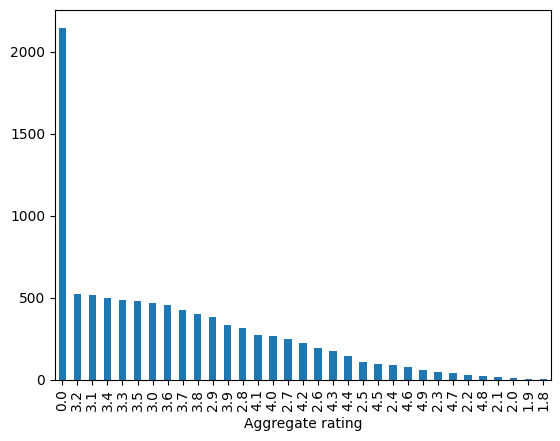

In [ ]:
# Level1-Task1: Data Exploration & Preprocessing
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset .csv")

# Rows and columns
print("Shape:", df.shape)

# Missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing or drop
df.fillna(method='ffill', inplace=True)  # Or df.dropna()

# Data types
print("Data types:\n", df.dtypes)

# Check imbalance in target
df['Aggregate rating'].value_counts().plot(kind='bar')


In [ ]:
# Level1-Task2: Descriptive Analysis
# Statistical measures
print(df.describe())

# Categorical variables
print(df['Country Code'].value_counts())
print(df['City'].value_counts())
print(df['Cuisines'].value_counts())

# Top cuisines and cities
print("Top cuisines:\n", df['Cuisines'].value_counts().head())
print("Top cities:\n", df['City'].value_counts().head())


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

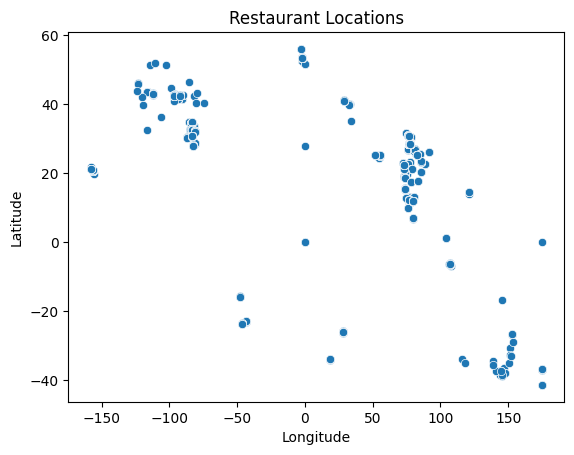

<Axes: xlabel='Longitude', ylabel='Latitude'>

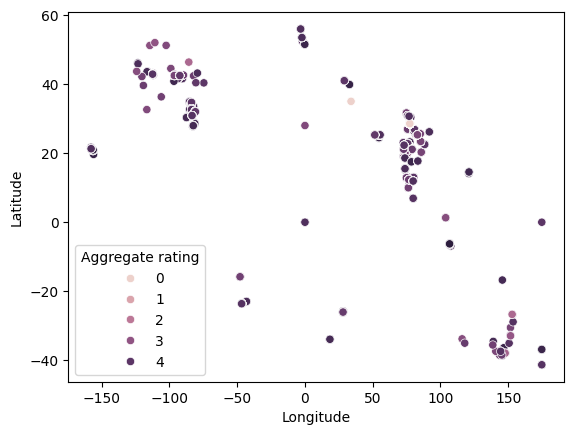

In [ ]:
# Level1-Task3: Geospatial Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of locations
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Restaurant Locations')
plt.show()

# Ratings vs location
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df)


In [ ]:
# Level2-Task1: Table Booking & Online Delivery
# Percentages
print("Table Booking %:", df['Has Table booking'].value_counts(normalize=True) * 100)
print("Online Delivery %:", df['Has Online delivery'].value_counts(normalize=True) * 100)

# Avg ratings
print(df.groupby('Has Table booking')['Aggregate rating'].mean())
print(df.groupby('Has Online delivery')['Aggregate rating'].mean())

# Delivery by price
print(df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True))

Table Booking %: Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Online Delivery %: Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
Price range  Has Online delivery
1            No                     0.842259
             Yes                    0.157741
2            No                     0.586894
             Yes                    0.413106
3            No                     0.708097
             Yes                    0.291903
4            No                     0.909556
             Yes                    0.090444
Name: proportion, dtype: float64


In [ ]:
#Level2-Task2: Price Range Analysis
# Most common price
print(df['Price range'].value_counts())

# Avg rating by price
print(df.groupby('Price range')['Aggregate rating'].mean())

# Color with highest avg rating
print(df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False))


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64


In [ ]:
# Level2-Task3: Feature Engineering
# Length features
df['Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()

# Encode
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [ ]:
# Level3-Task1: Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Price range', 'Has Online Delivery', 'Has Table Booking']]
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.7421468499350334


In [ ]:
# Level3-Task2: Customer Preference Analysis
# Cuisine vs rating
print(df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False))

# Most popular cuisines
print(df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head())


Cuisines
Burger, Bar Food, Steak                 4.9
American, Burger, Grill                 4.9
American, Caribbean, Seafood            4.9
American, Coffee and Tea                4.9
Mexican, American, Healthy Food         4.9
                                       ... 
Tibetan, South Indian, North Indian     0.0
Afghani, Mughlai, Chinese               0.0
Tibetan                                 0.0
Turkish, Arabian, Moroccan, Lebanese    0.0
Tibetan, Chinese, North Indian          0.0
Name: Aggregate rating, Length: 1825, dtype: float64
Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  22085
Name: Votes, dtype: int64


<Axes: xlabel='City'>

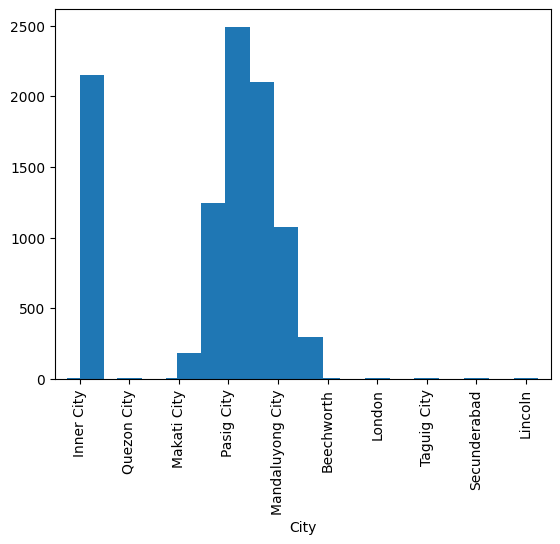

In [ ]:
# Level3-Task3: Data Visualization
# Histogram
df['Aggregate rating'].hist()

# Bar plot: Cuisines vs rating
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

# City vs Rating
df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
